# 3. Polynomial Regression(다항회귀)

- 앞에서 작업했던 것처럼 데이터의 형태가 직선 하나로 표현될 수 있는 것은 아님
- 그래프 예제(https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)
<img src='https://miro.medium.com/max/700/1*zOl_ztYqnzyWRkBffeOsRQ.png'>


## 공식  <h3> y = b + m<sub>1</sub>x + m<sub>2</sub>x<sup>2</sup> + m<sub>3</sub>x<sup>3</sup> + ....... + m<sub>n</sub>x<sup>n</sup></h3>
    - 독립변수 x 를 확장하는 방식

#### [참고] https://arachnoid.com/polysolve/

### 공부 시간에 따른 시험 점수 (우등생)

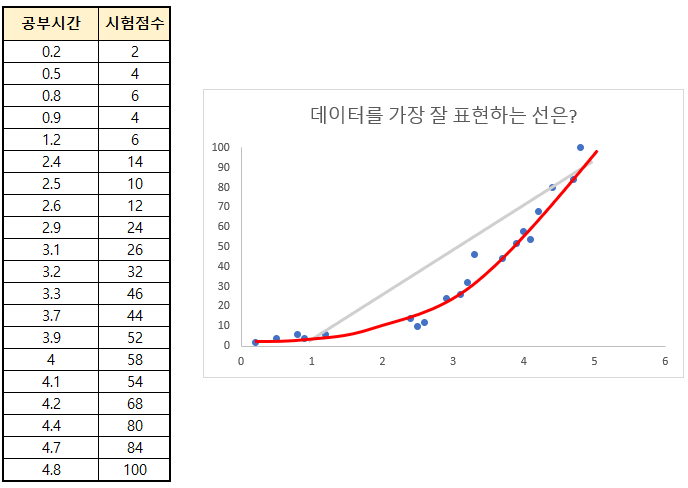

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('./dataset/PolynomialRegressionData.csv')

In [4]:
dataset.head(3)

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### 단순선형회귀

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X, y)

LinearRegression()

In [9]:
y_pred = lr.predict(X)

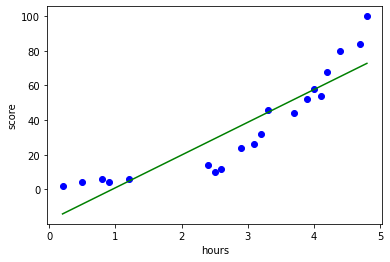

In [15]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [16]:
lr.score(X,y)

0.8169296513411765

### 다항회귀
- 사이킷런은 다항회귀를 위한 API는 없음
- PolynomialFeatures() 를 통해 단항 피처를 다항 피처들로 변환 후 LinearRegression 적용

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X) # [x] => [x^0, x^1, x^2]

In [18]:
X_poly

array([[ 1.  ,  0.2 ,  0.04],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  0.8 ,  0.64],
       [ 1.  ,  0.9 ,  0.81],
       [ 1.  ,  1.2 ,  1.44],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  2.6 ,  6.76],
       [ 1.  ,  2.9 ,  8.41],
       [ 1.  ,  3.1 ,  9.61],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.3 , 10.89],
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  3.9 , 15.21],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  4.1 , 16.81],
       [ 1.  ,  4.2 , 17.64],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  4.7 , 22.09],
       [ 1.  ,  4.8 , 23.04]])

In [20]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [21]:
poly_lr = LinearRegression()

In [22]:
poly_lr.fit(X_poly, y)

LinearRegression()

In [24]:
y_poly_pred = poly_lr.predict(X_poly)

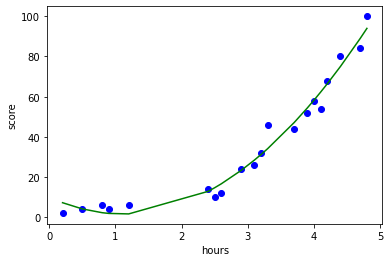

In [25]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_poly_pred, color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [28]:
poly = PolynomialFeatures(degree=4)

X_poly = poly.fit_transform(X) # [x] => [x^0, x^1, x^2, x^3, x^4]

In [34]:
X_poly

array([[1.000000e+00, 2.000000e-01, 4.000000e-02, 8.000000e-03,
        1.600000e-03],
       [1.000000e+00, 5.000000e-01, 2.500000e-01, 1.250000e-01,
        6.250000e-02],
       [1.000000e+00, 8.000000e-01, 6.400000e-01, 5.120000e-01,
        4.096000e-01],
       [1.000000e+00, 9.000000e-01, 8.100000e-01, 7.290000e-01,
        6.561000e-01],
       [1.000000e+00, 1.200000e+00, 1.440000e+00, 1.728000e+00,
        2.073600e+00],
       [1.000000e+00, 2.400000e+00, 5.760000e+00, 1.382400e+01,
        3.317760e+01],
       [1.000000e+00, 2.500000e+00, 6.250000e+00, 1.562500e+01,
        3.906250e+01],
       [1.000000e+00, 2.600000e+00, 6.760000e+00, 1.757600e+01,
        4.569760e+01],
       [1.000000e+00, 2.900000e+00, 8.410000e+00, 2.438900e+01,
        7.072810e+01],
       [1.000000e+00, 3.100000e+00, 9.610000e+00, 2.979100e+01,
        9.235210e+01],
       [1.000000e+00, 3.200000e+00, 1.024000e+01, 3.276800e+01,
        1.048576e+02],
       [1.000000e+00, 3.300000e+00, 1.08900

In [29]:
poly_lr = LinearRegression()

In [30]:
poly_lr.fit(X_poly, y)

LinearRegression()

In [31]:
y_poly_pred = poly_lr.predict(X_poly)

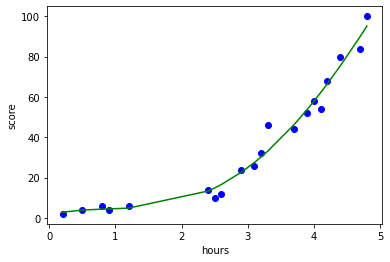

In [32]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_poly_pred, color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [26]:
# 단순선형회귀

lr.predict([[2]])

array([19.85348988])

In [33]:
# 다항회귀

poly_lr.predict(poly.fit_transform([[2]]))

array([8.70559135])

### 과대 적합

In [35]:
poly = PolynomialFeatures(degree=10)

X_poly = poly.fit_transform(X)

In [36]:
poly_lr = LinearRegression()

In [37]:
poly_lr.fit(X_poly, y)

LinearRegression()

In [38]:
y_poly_pred = poly_lr.predict(X_poly)

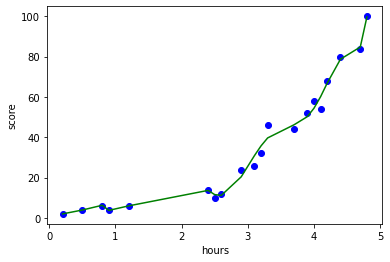

In [39]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_poly_pred, color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [40]:
poly_lr.predict(poly.fit_transform([[2]]))

array([29.89734668])

### 사이킷런 과소적합/과대적합

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html